# Post processing `SPaRTA` simulations
Welcome! This is `SPaRTA` 🛡️ = SPeedy Lyman alpha Ray Tracing Algorithm. The code can be used to perform quickly MC simulations of the trajectories of absorbed Lyman alpha photons in the IGM, plotting them, and gather insights on their properties.

In this tutorial we show how to...
- Compute and plot the root-mean-square (RMS) of cosmological fields in linear perturbation theory.
- Compute and plot the two-point correlation function of cosmological fields in linear perturbation theory.
- Compute and plot the Pearson coefficient of cosmological fields in linear perturbation theory.

Let us import first the package of `SPaRTA` and other packages we need for this tutorial.

In [2]:
import sparta
import numpy as np
import matplotlib.pyplot as plt

It is VERY recommended for `SPaRTA` users to have the `latex` package installed in the same python environment where `SPaRTA` is installed.
If you have latex installed then you may run the next cell, otherwise do not run it as it will raise errors and no plots in this tutorial will be shown!

In [3]:
plt.rcParams.update({"text.usetex": True, "font.family": "Times new roman"})

We also use the following color palette for this toturial (this combination is good for colorblindness).

In [4]:
import matplotlib as mpl

colors =  ['#377eb8', '#ff7f00', '#4daf4a',
           '#f781bf', '#a65628', '#984ea3',
           '#999999', '#e41a1c', '#dede00']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

## Cosmological correlation functions

In order to simulate the cosmological fields in the simulation, `SPaRTA` employs linear perturbation theory with Gaussian initial conditions. The fundamental quantity of interest is the two-point correlation function. Consider a field $A$ at redshift $z_1$ and field $B$ at redshift $z_2$. The two-point correlation function of the two fields, as a function of the comoving distance $r$ along a unit vector $\mathbf n_{||}$, is
\begin{equation*}
\left\langle A\left(\mathbf{x},z_{1}\right)B\left(\mathbf{x}+r\,\mathbf{n}_{||},z_{2}\right)\right\rangle=\int_{0}^{\infty}\frac{dk}{k}\Delta_{\mathcal{R}}^{2}\left(k\right){\mathcal{T}}_A\left(k,z_{1}\right){\mathcal{T}}_B\left(k,z_{2}\right)W_{A,B}\left(kr\right)
\end{equation*}
where $\mathcal T_X\left(k,z\right)$ is the transfer function of field $X$ at redshift $z$, $\Delta_R^2\left(k\right)$ is the primordial curvature dimensionless power spectrum, and $W_{A,B}\left(kr\right)$ is the window function for the fields $A$ and $B$ (for example, if $A$ and $B$ are scalars, then the window function is $\sin kr/kr$).

Very often, in the evaluation of the two-point correlation function, the smoothed versions of the fields are considered. This means that instead of using $\mathcal T_X\left(k,z\right)$, the transfer function that is used in practice is
\begin{equation*}
\mathcal T_X\left(k,z\right)\to\mathcal T_X\left(k,z\right)W_\mathrm{top}\left(kr_\mathrm{smooth}\right),\qquad\text{where}\qquad W_\mathrm{top}\left(x\right)=\frac{3\left(\sin x -x\cos x\right)}{x^3},
\end{equation*}
and $r_\mathrm{smooth}$ is the smoothing radius.

The RMS of a field $A$ at redshift $z$ can be computed by applying the formula for the two-point correlation function with $z_1=z_2=z$ and $r=0$. This gives
\begin{equation*}
\left\langle A^2\left(\mathbf{x},z\right)\right\rangle=\int_{0}^{\infty}\frac{dk}{k}\Delta_{\mathcal{R}}^{2}\left(k\right){\mathcal{T}}_A^2\left(k,z\right).
\end{equation*}

The Pearson coefficient $\rho_{AB}$ is the normalized two-point correlation function, and is always found in the regime $\rho_{AB}\in\left[-1,1\right]$. For zero-mean fields, it is given by
\begin{equation*}
\rho_{AB}\equiv \frac{\langle AB\rangle}{\langle A^{2}\rangle^{1/2}\langle B^{2}\rangle^{1/2}}=\frac{\int_{0}^{\infty}\frac{dk}{k}\Delta_{\mathcal{R}}^{2}\left(k\right){\mathcal{T}}_A\left(k,z_{1}\right){\mathcal{T}}_B\left(k,z_{2}\right)W_{A,B}\left(kr\right)}{\left[\int_{0}^{\infty}\frac{dk}{k}\Delta_{\mathcal{R}}^{2}\left(k\right){\mathcal{T}}_A^2\left(k,z_1\right)\right]^{1/2}\left[\int_{0}^{\infty}\frac{dk}{k}\Delta_{\mathcal{R}}^{2}\left(k\right){\mathcal{T}}_B^2\left(k,z_2\right)\right]^{1/2}}.
\end{equation*}

## Compute and plot RMS

`SPaRTA` computes the transfer functions with `CLASS`. Given a `COSMO_PARAMS` instance, We can generate a `CLASS` object with the method `run_CLASS`. This object contains all the necessary transfer functions.

In [5]:
cosmo_params = sparta.COSMO_PARAMS() # Creates a default COSMO_PARAMS instance
CLASS_OUTPUT = cosmo_params.run_CLASS()

Once we have `CLASS_OUTPUT`, we can compute the variance of any smoothed field, at any redshift, with `compute_RMS`. For example:

In [8]:
# Compute sigma8
sigma8 = sparta.compute_RMS(
    CLASS_OUTPUT = CLASS_OUTPUT,
    r_smooth = 8/CLASS_OUTPUT.h(),
    z=0,
    kind = "density_m" # options are "density_m", "density_b", "v_parallel", "v_perp" (or simply "velocity", instead the last two). Default is "density_m"
)
# Print the result
print(f"sigma8 = {sigma8}.\nThis corresponds to:")
cosmo_params.print()

sigma8 = 0.8103860080650431.
This corresponds to:
  h = 0.6766
  Omega_m = 0.30964144154550644
  Omega_b = 0.04897468161869667
  A_s = 2.105209331337507e-09
  n_s = 0.9665
  T = 10000.0
  x_HI = 1.0


We can easily plot the RMS of the fields as a function of redshift with `plot_RMS` (note that the velocity RMS is normalized by the speed of light $c$).

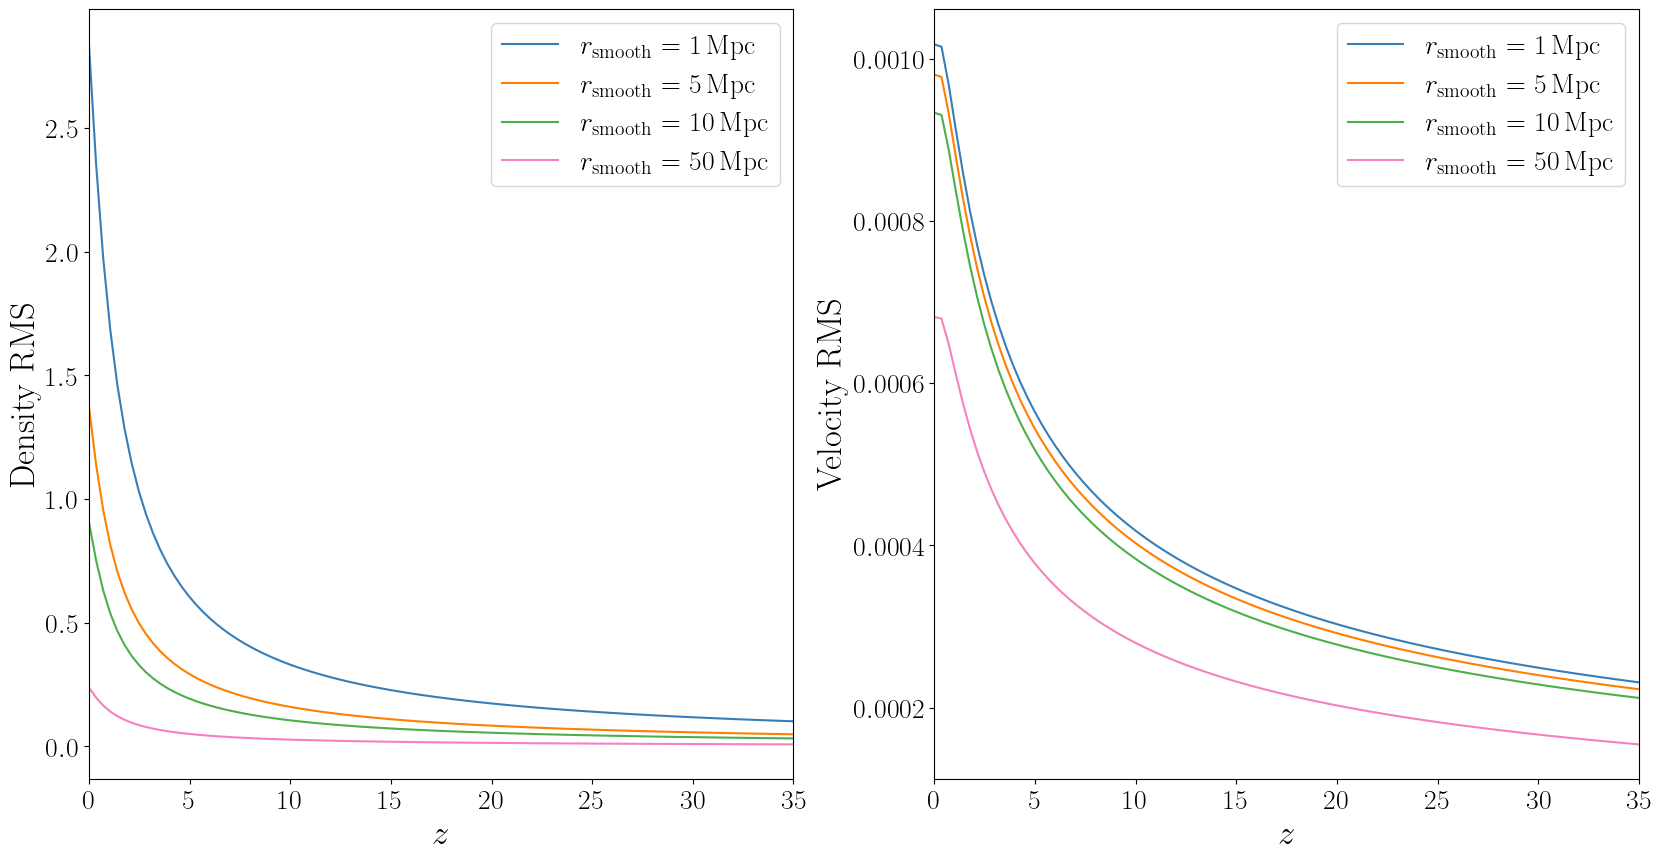

In [18]:
r_smooth_list = [1,5,10,50]
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
for r_smooth in r_smooth_list:
    # Plot density RMS
    fig, axes[0] = sparta.plot_RMS(
        CLASS_OUTPUT = CLASS_OUTPUT,
        r_smooth = r_smooth,
        ax = axes[0],
        kind = "density_m",
        label = "$r_\\mathrm{smooth}=" + f"{r_smooth}" + "\\,\\mathrm{Mpc}$"
    )
    axes[0].set_ylabel("Density RMS")
    # Plot velocity RMS
    fig, axes[1] = sparta.plot_RMS(
        CLASS_OUTPUT = CLASS_OUTPUT,
        r_smooth = r_smooth,
        ax = axes[1],
        kind = "velocity",
        label = "$r_\\mathrm{smooth}=" + f"{r_smooth}" + "\\,\\mathrm{Mpc}$"
    )
    axes[1].set_ylabel("Velocity RMS")

From here, we can see that the RMS of both fields is a monotonously decreasing function of redshift (or monotonously decreasing function of time), due to gravitational instability. In addition, we can also see that the velocity field is more auto-correlated on larger distances, compared to the density field, since the RMS of the velocity field decays more slowly with the smoothing scale.

## Two-point correlation function

We can compute the two-point correlation function between two fields, $A$ and $B$, at any redshifts $z_1$ and $z_2$, with `compute_correlation_function`. For example, the following code lines replicate Fig. 6 in https://arxiv.org/pdf/2302.08506.

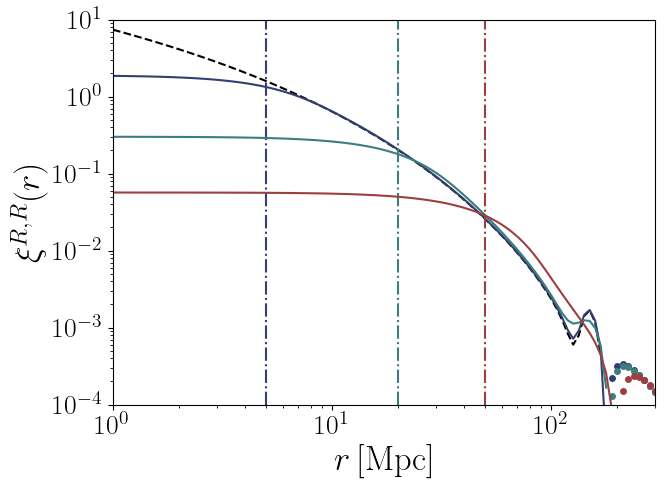

In [20]:
fix, ax = plt.subplots(1,1,figsize=(7,5))
r_smooth_list = [0,5,20,50]
colors_for_this_fig = ['k','#333F70','#3C7D7E','#9C403F']
r_array = np.logspace(0,np.log10(300),100)
for ind, r_smooth in enumerate(r_smooth_list):
    # Compute the two-point correlation function for each r in the array
    xi_arr = np.array(
        [
            sparta.compute_correlation_function(
                CLASS_OUTPUT = CLASS_OUTPUT,
                r = r,
                r_smooth = r_smooth,
                # All the values below are the defaults for this function
                z1 = 0, # Redshift of field A
                z2 = 0, # Redshift of field B
                kind1 = "density_m", # Kind of field A
                kind2 = "density_m", # Kind of field B
                normalization = False # whether to normalize the correlation function with the product of the RMSs
            ) 
        for r in r_array]
    )
    # Get the indices where xi_arr is positive or negative
    p_inds = xi_arr > 0
    n_inds = xi_arr < 0
    # Determine line style of the curve
    if r_smooth == 0:
        ls = '--'
    else:
        ls = '-'
    color = colors_for_this_fig[ind]
    # Plot the positive xi values with a curve
    ax.loglog(r_array[p_inds],xi_arr[p_inds],color=color,ls=ls)
    # Plot the negative xi values with markers
    if r_smooth > 0:
        ax.loglog(r_array[n_inds],abs(xi_arr[n_inds]),ls='',marker='o',markerfacecolor=color,markeredgecolor='none',markersize=5)
    # Plot vertical lines to indicate the smoothing scale
    ax.axvline(r_smooth,ls='-.',color=color)
# Prettify plot
ax.set_xlim([1,300])
ax.set_ylim([1e-4,10])
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('$r\\,[\\mathrm{Mpc}]$',fontsize=25)
ax.set_ylabel('$\\xi^{R,R}(r)$',fontsize=25);

This plot can also easily be made with `plot_correlation_function` (though without the negative values, since the y-axis is presnted in logarithmic scale)

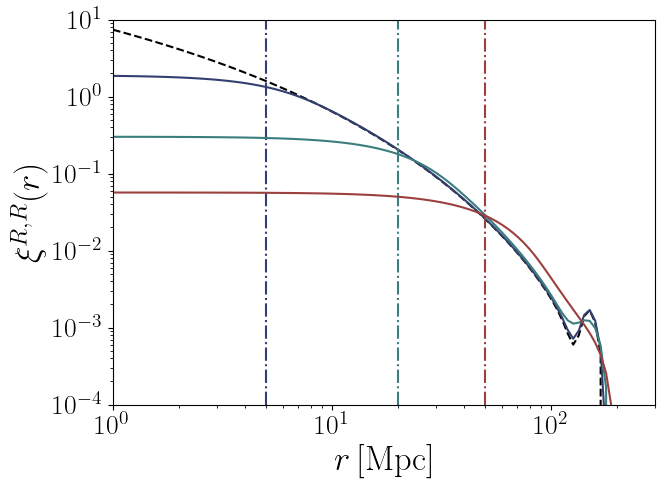

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
for ind, r_smooth in enumerate(r_smooth_list):
    if r_smooth == 0:
        ls = '--'
    else:
        ls = '-'
    fig, ax = sparta.plot_correlation_function(
        CLASS_OUTPUT = CLASS_OUTPUT,
        z = 0., # The redshift of field A
        r_smooth = r_smooth,
        r_min = 1.,
        r_max = 300.,
        evolve_z2 = False,
        log_x = True,
        kinds = ("density_m","density_m"), # The kinds of fields A and B
        ax = ax,
        color=colors_for_this_fig[ind],
        ls = ls
    )
    ax.axvline(r_smooth,ls='-.',color=colors_for_this_fig[ind])
ax.set_ylim([1e-4,10])
ax.set_ylabel('$\\xi^{R,R}(r)$',fontsize=25)
ax.set_yscale('log');

Notice the `evolve_z2` argument. If this parameter is True, then `z_2` is determined from solving the equation $r=R_\mathrm{SL}\left(z_1,z_2\right)$, where $R_\mathrm{SL}\left(z_1,z_2\right)$ is the comoving distance between $z_1$ and $z_2$. Otherwise, if False, $z_2=z_1$.

You are encouraged to change the parameters of `plot_correlation_function` (or `compute_correlation_function`) and see what happens!

## Pearson coefficient

Likewise, we can plot the Pearson coefficient with `plot_Pearson_coefficient` (and also compute it with `compute_Pearson_coefficient`). We show some examples below.

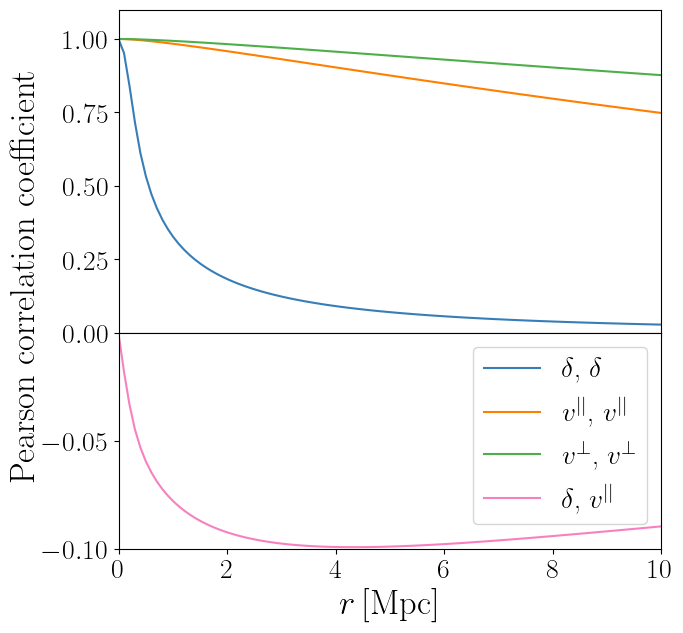

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=True, gridspec_kw={'height_ratios': [0.6, 0.4]})
fig.subplots_adjust(hspace=0)
kinds_list = [("density_b","density_b"),("v_parallel","v_parallel"),("v_perp","v_perp"),("density_b","v_parallel")]
for ind, kinds in enumerate(kinds_list):
    # Plot auto-correlation at the top panel
    if kinds[0] == kinds[1]:
        ax = axes[0]
    # Plot cross-correlation at the bottom panel
    else:
        ax = axes[1]
    # Plot the Pearson coefficient for each pair of fields in kinds_list
    fig, ax = sparta.plot_Pearson_coefficient(
        CLASS_OUTPUT = CLASS_OUTPUT,
        z = 10,
        r_smooth = 0.2,
        r_min = 0.,
        r_max = 10.,
        evolve_z2 = True,
        ax = ax,
        kinds = kinds,
        color = colors[ind],
        ls = ls
    )
# Prettify plot
fig.supylabel("Pearson correlation coefficient", x=-0.03, fontsize=25)
axes[0].set_ylim([0,1.1])
axes[1].set_ylim([-0.1,0])
axes[0].set_xlabel("")
axes[1].set_ylabel("")
axes[0].set_ylabel("")
axes[1].set_yticks([-0.1,-0.05])
# We place "ghot" horizontal lines at the bottom panel, just to show the legend there
axes[1].axhline(-2,color=colors[0],label="$\\delta$, $\\delta$")
axes[1].axhline(-2,color=colors[1],label="$v^{||}$, $v^{||}$")
axes[1].axhline(-2,color=colors[2],label="$v^{\\perp}$, $v^{\\perp}$")
axes[1].axhline(-2,color=colors[3],label="$\\delta$, $v^{||}$")
axes[1].legend(fontsize=20);

Your are encouraged to run the above cell with different `z` values. Note that this plot is insensitive to the chosen `z` value!

Furthermore, notice how the components of the velocity field are much more correlated than the density field, a feature we could already predict when we plotted the RMS of the fields. Finally, note the anti-correlation between $\delta$ and $v^{||}$ for $r>0$, an expected result due to gravity; over-dense regions tend to attract particles towards them, thereby lowering the parallel component of their velocity field (defined positive when it points outwards).